# 1. Importing the data

In [156]:
# Import all necessary libraries
import pandas as pd
import numpy as np
from numpy import nan as NA
import requests as rq
import json
import os
import plotly.graph_objects as go
import seaborn as sns
import psycopg2
import matplotlib.pyplot as plt
import csv

# After downloading the datasets "Internet availability", "Education attainment" and "Population by county",
# you will need to save the *.csv files to your Downloads folder. Once done, run the code below.

# Standard file path for all files
home_directory = os.path.expanduser('~') # Retrieve user's home directory
file_path = os.path.join(home_directory,'Downloads') # Create file path

# Create function to import *.csv file and handle exceptions
def import_csv_file(file_path):
    try:
        if not os.path.exists(file_path): # Check if the file exists
            raise FileNotFoundError(f"The file {file_path} does not exist.")
        df = pd.read_csv(file_path) # Read the *.csv file into a Pandas DataFrame
        return df
    except FileNotFoundError as e:
        print(f"Error: {e}")
    except pd.errors.ParserError:
        print(f"Error: Unable to parse the CSV file. Make sure it is a valid CSV file.")
    except Exception as e:
        print(f'Error: An unexpected error occurred. {str(e)}')
        
# Create function to make API request and handle exceptions
def make_api_request(api_url, file_path): # Function to make API request and handle exceptions
    try:
        response = rq.get(api_url) # Make the API request
        if response.status_code == 200: # Check if the request was successful
            try: # Try to parse the JSON response
                data = response.json()
                df = pd.DataFrame(data[1:], columns=data[0]) # Convert data to a Pandas DataFrame
                df.to_csv(file_path, index=False) # Export the DataFrame to CSV
                return df
            except json.JSONDecodeError:
                print(f'Error: Unable to decode JSON response for {api_url}.')
        else:
            print(f'Error: Unable to fetch data for {api_url}. Status code: {response.status_code}')
            print(response.content)  # Print the response content for inspection
    except Exception as e:
        print(f'Error: An unexpected error occurred. {str(e)}')

# 1.1. Percentage of Households with No Internet Access dataset
file1 = 'data_061018.csv' # Input file name
internet_file_name = 'internet_dataset.csv' # Output file name
internet_csv_file = os.path.join(file_path,file1) # Join path with file name
file_path = internet_csv_file
internet = import_csv_file(file_path) # Import the *.csv file of the first dataset
if internet is not None:
    print("Household with no internet access dataset sample:")
    print(internet.head()) # Display the first few rows of the DataFrames if not null
    print()
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

# 1.2. Socioeconomic Status - Educational Attainment dataset
file2 = 'data_103302.csv' # Input file name
education_file_name = 'education_dataset.csv' # Output file name
education_csv_file = os.path.join(file_path,file2) # Join path with file name
file_path = education_csv_file
education = import_csv_file(file_path) # Import the *.csv file of the second dataset
if education is not None: 
    print("Educational attainment dataset sample:")
    print(education.head()) # Display the first few rows of the DataFrames if not null
    print()
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

# 1.3. Median household income in the past 12 months (in 2021 inflation-adjusted dollars) dataset
api_key = '4b4ba8551d1fa3638f621a3840d14bae0f6858bc' # API Key
api_url = f'https://api.census.gov/data/2021/acs/acsse?get=NAME,K201902_001E&for=county:*&key={api_key}' # API URL
income_file_name = 'income_dataset.csv' # Output file name
income_csv_file = os.path.join(file_path,income_file_name) # Join path with file name
file_path = income_csv_file
income = make_api_request(api_url, file_path) # Make the API request for the third dataset
if income is not None: 
    print("Median household income dataset sample:")
    print(income.head()) # Display the first few rows of the DataFrames if not null
    print("\nMedian household income dataset exported as CSV file into the path:") # Print the path to the exported CSV files
    print(income_csv_file)
    print()
income_dataset = pd.read_csv(income_csv_file) # Import the *.csv file created
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

# 1.4. Population by county dataset
file3 = 'data_103802.csv' # Input file name
population_file_name = 'population_dataset.csv' # Output file name
population_csv_file = os.path.join(file_path,file3) # Join path with file name
file_path = population_csv_file
population = import_csv_file(file_path) # Import the *.csv file of the fourth dataset
if population is not None: 
    print("Population by county dataset sample:")
    print(population.head()) # Display the first few rows of the DataFrames if not null
    print()
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

Household with no internet access dataset sample:
   StateFIPS    State  CountyFIPS   County  Start Year  End Year  Value  \
0          1  Alabama        1001  Autauga        2013      2017   20.8   
1          1  Alabama        1001  Autauga        2014      2018   19.0   
2          1  Alabama        1001  Autauga        2015      2019   17.2   
3          1  Alabama        1001  Autauga        2016      2020   15.3   
4          1  Alabama        1001  Autauga        2017      2021   12.7   

   Data Comment  Unnamed: 8  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

Educational attainment dataset sample:
   StateFIPS    State  CountyFIPS   County  Start Year  End Year  Value  \
0          1  Alabama        1001  Autauga        2017      2021   12.7   
1          1  Alabama        1003  Baldwin        2017      2021    9.7   
2          1  Alabama        1005  Barbour        2017

## 2. Checking the quality of the data

In [157]:
# 2.1. Percentage of Households with No Internet Access dataset
if internet is not None:
    print("Household with no internet access dataset overview:")
    print(internet.info()) # Describe the dataset
    print()

# 2.2. Socioeconomic Status - Educational Attainment dataset
if education is not None: 
    print("Educational attainment dataset overview:")
    print(education.info()) # Describe the dataset
    print()

# 2.3. Median household income in the past 12 months (in 2021 inflation-adjusted dollars) dataset
if income_dataset is not None: 
    print("Median household income dataset overview:")
    print(income_dataset.info()) # Describe the dataset
    print()

# 2.4. Population by county dataset
if population is not None: 
    print("Population by county dataset overview:")
    print(population.info()) # Describe the dataset
    print()

Household with no internet access dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15712 entries, 0 to 15711
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StateFIPS     15712 non-null  int64  
 1   State         15712 non-null  object 
 2   CountyFIPS    15712 non-null  int64  
 3   County        15712 non-null  object 
 4   Start Year    15712 non-null  int64  
 5   End Year      15712 non-null  int64  
 6   Value         15712 non-null  float64
 7   Data Comment  0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.1+ MB
None

Educational attainment dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StateFIPS     3143 non-null   int64  
 1   State         3143

## 3. Pre-processing the data and plotting visuals

Household with no internet access dataset overview:
Missing values:
0
Non-numeric values:
0
        State      Value
0     Alabama  26.672836
1      Alaska  20.027891
2     Arizona  21.864000
3    Arkansas  26.998400
4  California  13.423103


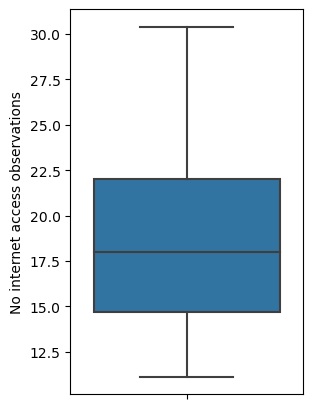

Educational attainment dataset overview:
Missing values:
0
Non-numeric values:
0
        State      Value
0     Alabama  21.253731
1      Alaska  18.763333
2     Arizona  17.600000
3    Arkansas  21.706667
4  California   9.725862


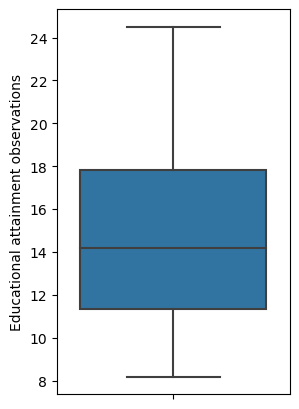

Median household income dataset overview:
Missing values:
0
Non-numeric values:
0
        State    Value
0     Alabama  49643.0
1      Alaska  78856.0
2     Arizona  55829.5
3    Arkansas  48698.0
4  California  74846.0


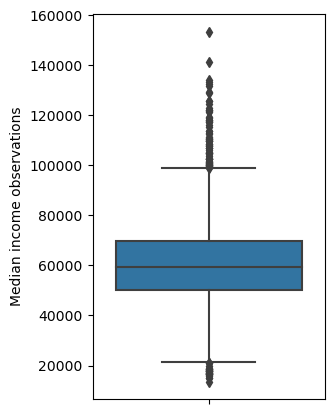


Population by county dataset overview:
Missing values:
0
Non-numeric values:
   StateFIPS       State  Year     Value  Data Comment  Unnamed: 5
0          1     Alabama  2021   5039877           NaN         NaN
1          2      Alaska  2021    732673           NaN         NaN
2          4     Arizona  2021   7276316           NaN         NaN
3          5    Arkansas  2021   3025891           NaN         NaN
4          6  California  2021  39237836           NaN         NaN
0


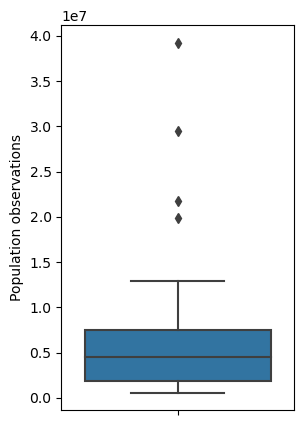

In [158]:
# Check for missing values, non-numeric values and outliers in the datasets

# Set visuals standard
colors = ['lightslategray',] * 10
colors[0] = 'crimson'

# 3.1. Percentage of Households with No Internet Access dataset
internet_bystate = internet.groupby(['State'], as_index=False)['Value'].mean() # Group observations by state using the mean percentage of the predictor 
internet_bystate_sortdesc = internet_bystate.sort_values('Value',ascending=False) # Sort the observations in descending order
xvar1 = list(internet_bystate_sortdesc.head(10)['State']) # Set X axis labels
yvar1 = list(internet_bystate_sortdesc.head(10)['Value']) # Set Y axis labels
fig1 = go.Figure(data=[go.Bar(x=xvar1,y=yvar1,marker_color=colors)]) # Create a histogram of the predictor
fig1.update_layout(title_text = 'States with the highest percentage of households with no internet access, 2021', # Set the title of the figure
                   title_x=0.5, # Center the title of the plot horizontally
                   xaxis_title_text='States', # Set X axis title
                   yaxis_title_text='Percentage of no internet access', # Set Y axis title
                   bargap=0.05) # Set gap between the bars
fig1.show()
internet = internet_bystate # Replace the dataset for the grouped one
print("\033[1mHousehold with no internet access dataset overview:\033[0m")
internet_null = internet['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(internet_null) 
internet_NaN = pd.to_numeric(internet['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(internet_NaN)
print(internet.head())
plt.figure(figsize=(3, 5))  # Set boxplot size
sns.boxplot(y=internet['Value']) # Create a boxplot to check for outliers
plt.ylabel('No internet access observations') # Set Y axis label
plt.show()
print()

# 3.2. Socioeconomic Status - Educational Attainment dataset
education_bystate = education.groupby(['State'], as_index=False)['Value'].mean() # Group observations by state using the mean percentage of the predictor 
education_bystate_sortdesc = education_bystate.sort_values('Value',ascending=True) # Sort the observations in ascending order
xvar2 = list(education_bystate_sortdesc.head(10)['State']) # Set X axis labels
yvar2 = list(education_bystate_sortdesc.head(10)['Value']) # Set Y axis labels
fig2 = go.Figure(data=[go.Bar(x=xvar2,y=yvar2,marker_color=colors)]) # Create a histogram of the predictor
fig2.update_layout(title_text = 'States with the lowest percentage of the population with higher education, 2021', # Set the title of the figure
                   title_x=0.5, # Center the title of the plot horizontally
                   xaxis_title_text='States', # Set X axis title
                   yaxis_title_text='Percentage of educational attainment', # Set Y axis title
                   bargap=0.05) # Set gap between the bars
fig2.show()
education = education_bystate # Replace the dataset for the grouped one
print("\033[1mEducational attainment dataset overview:\033[0m")
education_null = education['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(education_null)
education_NaN = pd.to_numeric(education['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(education_NaN)
print(education.head())
plt.figure(figsize=(3, 5))  # Set boxplot size
sns.boxplot(y=education['Value']) # Create a boxplot to check for outliers
plt.ylabel('Educational attainment observations') # Set Y axis label
plt.show()
print()

# 3.3. Median household income in the past 12 months (in 2021 inflation-adjusted dollars) dataset
income_dataset = income_dataset.rename(columns={'county': 'county code'}) # Rename the attribute county code
income_dataset = income_dataset.rename(columns={'state': 'state code'}) # Rename the attribute state code
income_dataset = income_dataset.rename(columns={'K201902_001E': 'Value'}) # Rename the attribute K201902_001E to Median Income
income_dataset[['County', 'State']] = income_dataset['NAME'].str.split(', ',expand=True) # Split the attribute NAME into County and State, delimited by the comma
income_dataset['County'] = income_dataset['County'].str.replace(' County', '') # Remove the "County" text of the observations in the attribute County
income_bystate = income_dataset.groupby(['State'], as_index=False)['Value'].median() # Group observations by state using the sum of the predictor 
income_bystate_sortdesc = income_bystate.sort_values('Value',ascending=False) # Sort the observations in descending order
yvar3 = list(income_bystate_sortdesc.head(10)['State']) # Set X axis labels
xvar3 = list(income_bystate_sortdesc.head(10)['Value']) # Set Y axis labels
fig3 = go.Figure(data=[go.Bar(x=xvar3,y=yvar3,marker_color=colors, orientation='h')]) # Create a histogram of the predictor
fig3.update_layout(title_text = 'States with the highest income per household, 2021', # Update the layout of the figure
                   title_x=0.5, # Center the title of the plot horizontally
                   xaxis_title_text='Median household income', # Set X axis title
                   yaxis_title_text='States', # Set Y axis title
                   yaxis=dict(autorange='reversed'), # Set the Y axis to show the highest value on top
                   bargap=0.05) # Set gap between the bars
fig3.show()
income = income_bystate # Replace the dataset for the grouped one
print("\033[1mMedian household income dataset overview:\033[0m")
income_null = income_dataset['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(income_null) # Check for missing values
income_NaN = pd.to_numeric(income_dataset['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(income_NaN)
print(income.head())
plt.figure(figsize=(3, 5))  # Set boxplot size
sns.boxplot(y=income_dataset['Value']) # Create a boxplot to check for outliers
plt.ylabel('Median income observations') # Set Y axis label
plt.show()
print()

# 3.4. Population by county dataset
population['Value'] = population['Value'].astype(str) # Convert the 'Value' column to string
population['Value'] = pd.to_numeric(population['Value'].str.replace('[^\d]', '', regex=True), errors='coerce') # Replace non-numeric characters and convert to numeric
print("\033[1mPopulation by county dataset overview:\033[0m")
population_null = population['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(population_null)
population_NaN = pd.to_numeric(population['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(population.head())
print(population_NaN)
plt.figure(figsize=(3, 5))  # Set boxplot size 
sns.boxplot(y=population['Value']) # Create a boxplot to check for outliers
plt.ylabel('Population observations') # Set Y axis label
plt.show()
print()

## 4. Uploading the data to the PostgreSQL database

In [155]:
# Merge all datasets into one
dataset = pd.merge(internet, education, on='State')
dataset.rename(columns = {'Value_x':'No Internet Access (%)', 
                          'Value_y':'Education Attainment (%)'}, 
                          inplace = True)
dataset = pd.merge(dataset, income, on='State')
dataset.rename(columns = {'Value':'Household Income ($)'}, 
                          inplace = True)
dataset = pd.merge(dataset, population, on='State')
dataset.rename(columns = {'Value':'Population'}, 
                          inplace = True)
print(dataset.head())

# Export new dataset as a new *.csv file
dataset.to_csv('DAP Project Dataset.csv', index=False)

# Connect to the database
try:
     dbConnection = psycopg2.connect(user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "postgres")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     dbCursor.execute('CREATE DATABASE state_percentage1;')
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError:
     print ("Error while connecting to PostgreSQL", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

# Create new dataset
createString = """
CREATE TABLE dataset(
state VARCHAR(255),
internet FLOAT,
education FLOAT);
"""

# 1. Percentage of Households with No Internet Access dataset

# 2. Socioeconomic Status - Educational Attainment dataset

# 3. Median household income in the past 12 months (in 2021 inflation-adjusted dollars) dataset

# 4. Population by county dataset

        State  No Internet Access (%)  Education Attainment (%)  \
0     Alabama               26.672836                 21.253731   
1      Alaska               20.027891                 18.763333   
2     Arizona               21.864000                 17.600000   
3    Arkansas               26.998400                 21.706667   
4  California               13.423103                  9.725862   

   Household Income ($)  Population  
0          49858.938776     5039877  
1          76536.800000      732673  
2          55751.928571     7276316  
3          49963.171429     3025891  
4          78087.019608    39237836  
Error while connecting to PostgreSQL connection to server at "192.168.56.30", port 5432 failed: Connection timed out (0x0000274C/10060)
	Is the server running on that host and accepting TCP/IP connections?



NameError: name 'dbConnection' is not defined